In [11]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

df = pd.read_csv('creditcard.csv')

df.shape

(284807, 31)

In [12]:
df.sample(n=10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
216274,140413.0,1.950200,-0.921416,-1.075804,-0.764673,1.225794,4.188849,-1.797694,1.217454,1.422246,...,0.204008,0.668674,0.291043,0.753067,-0.529891,0.647142,0.024010,-0.041470,5.90,0
9715,14470.0,1.101127,-0.192149,0.919032,0.231640,-0.745173,-0.163526,-0.606133,0.083366,1.511432,...,0.036112,0.292300,0.010690,0.232325,0.055835,1.029650,-0.083177,-0.002485,39.00,0
26673,34198.0,-0.350656,1.076414,1.272112,0.071335,-0.048181,-0.981418,0.705480,-0.045094,-0.315401,...,-0.265927,-0.734339,0.009020,0.318293,-0.176334,0.073446,0.239546,0.097572,10.98,0
39466,39850.0,-1.555048,0.411987,-0.923893,-0.411790,2.155529,3.095336,-1.005486,1.670531,-0.953537,...,0.059824,-0.299212,-0.286568,1.069826,-0.305568,0.471355,-0.129754,-0.214820,24.99,0
213880,139436.0,-1.637105,-0.106207,2.792867,1.478867,-0.863791,1.921046,-1.468767,-2.280504,1.240472,...,-1.259055,1.162946,-0.263051,-0.398937,0.471063,-0.171053,0.139247,-0.171091,144.00,0
181101,124825.0,-0.435791,0.240761,-1.633091,-0.050533,2.858534,4.045410,1.843716,0.504988,-0.759175,...,0.198789,0.521494,0.281809,0.688349,0.151385,-0.393512,0.206621,0.031852,255.99,0
12458,21852.0,1.157958,0.575824,0.774063,2.501785,-0.024634,0.002411,-0.145804,0.048122,0.474500,...,-0.378969,-1.022218,0.112966,-0.133449,0.200561,-0.298858,-0.045772,0.007402,8.17,0
2610,2140.0,-1.078722,0.948967,1.529385,-0.321436,0.676985,-1.247195,0.684026,-0.270354,-0.558981,...,-0.194386,-0.583891,-0.213695,0.385637,-0.168341,-0.073359,-0.140119,0.095744,1.29,0
124716,77399.0,-0.457087,0.886032,1.335755,-0.032769,0.032576,-0.362113,0.397874,0.303986,-0.396932,...,-0.190279,-0.574192,0.052532,0.123330,-0.351022,0.077588,0.246091,0.083284,2.99,0
234951,148184.0,-0.331458,0.419391,0.380208,-2.041728,0.173853,-1.104081,0.845606,-0.389267,1.063751,...,0.168521,0.830270,-0.345440,0.100535,0.516254,0.020073,-0.214466,-0.002752,9.95,0


<Axes: xlabel='Time', ylabel='Density'>

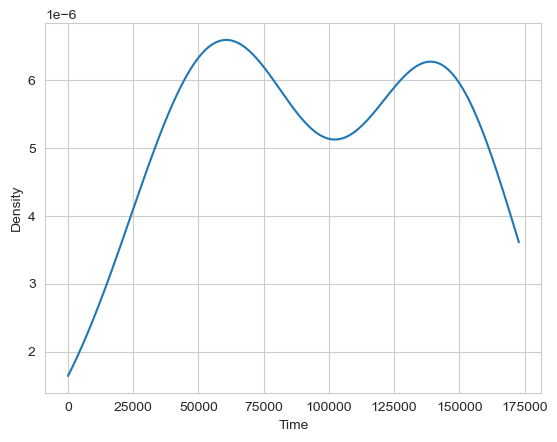

In [13]:
sns.set_style('whitegrid')
sns.kdeplot(df, x = df['Time'], bw_method=0.5, cut=0)

The above graph shows when the most transactions have occurred, which can be helpful for data analysis. Most of the data entries occurred 50,000 seconds after the first one.

<Axes: xlabel='Amount', ylabel='Density'>

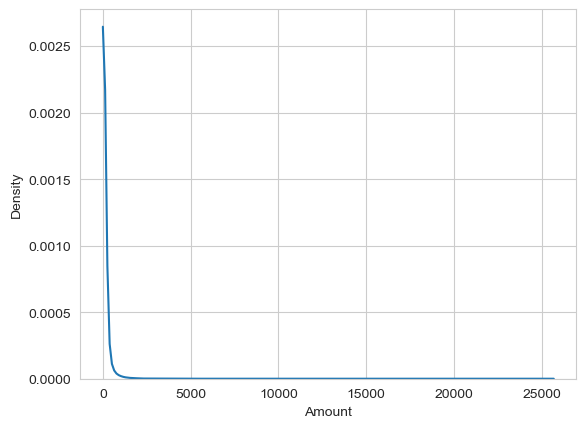

In [14]:
sns.kdeplot(df, x = df['Amount'], bw_method=0.5, cut=0)

The above graph shows the most common amount for transactions. A vast majority of the transactions are less than one hundred dollars or so.

In [15]:
class MachineLearning:
    def __init__(self, list_of_split_data):
        self.list_of_split_data = list_of_split_data

    def Random_Forest(self):
        clf = RandomForestClassifier()
        clf.fit(self.list_of_split_data[0], self.list_of_split_data[2])
        pred = clf.predict(self.list_of_split_data[1])
        print(accuracy_score(self.list_of_split_data[3], pred) * 100)
        print(classification_report(self.list_of_split_data[3], pred))

X = df.drop(["Class"], axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

list_of_split_data = [X_train_resampled, X_test, y_train_resampled, y_test]        

dm = MachineLearning(list_of_split_data)
dm.Random_Forest()


99.94967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.88      0.85       136

    accuracy                           1.00     85443
   macro avg       0.91      0.94      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Using the Random Forest implementation in sklearn. Create a 70% training/30% testing split, and use SMOTE to resampple the training data because the data is imbalanced (there are way more normal transactions than fraudulent ones). The model predicts with 99.95% accuracy, which is high but understandable given the imbalanced ratio of infraudulent vs. fraudulent and usage of a supervised learning model. A better metric for this type of problem would be precision (true positives / predicted positives), recall (true positives / actual positives), and F1 score (2 * precision * recall / (precision + recall)). As seen in the classification report, the F1 score was 0.85 for fraudulent transactions, which is fairly good for this type of problem.